In [4]:
import pandas as pd
import kagglehub
import plt
import seaborn as sns
from kagglehub import KaggleDatasetAdapter
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\omord\PycharmProjects\OsteoporosisScreening\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Download latest version
path = kagglehub.dataset_download("amitvkulkarni/lifestyle-factors-influencing-osteoporosis")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\omord\.cache\kagglehub\datasets\amitvkulkarni\lifestyle-factors-influencing-osteoporosis\versions\2


In [6]:
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "amitvkulkarni/lifestyle-factors-influencing-osteoporosis",
  "osteoporosis.csv",)

df.head()

C:\Users\omord\AppData\Local\Temp\ipykernel_5224\2949785613.py:1: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [7]:
print(df["Medications"].unique())

['Corticosteroids' nan]


In [8]:
data = df.copy()
mapping = {
    "Gender": {"Female": 1, "Male": 0},
    "Hormonal Changes": {"Postmenopausal": 1, "Normal": 0},
    "Family History": {"Yes": 1, "No": 0},
    "Race/Ethnicity": {"Asian": 1, "Caucasian": 2, "African American": 3},
    "Body Weight": {"Underweight": 1, "Normal": 0},
    "Calcium Intake": {"Low": 1, "Adequate": 0},
    "Vitamin D Intake": {"Insufficient": 1, "Sufficient": 0},
    "Physical Activity": {"Sedentary": 1, "Active": 0},
    "Smoking": {"Yes": 1, "No": 0},
    "Alcohol Consumption": {"Moderate": 1, "NaN": 0},
    "Medical Conditions": {"Rheumatoid Arthritis": 1, "Hyperthyroidism": 2, "NaN": 0},
    "Medications": {"Corticosteroids": 1, "NaN": 0},
    "Prior Fractures": {"Yes": 1, "No": 0}   
}

data.replace(mapping, inplace=True)
data.head()

C:\Users\omord\AppData\Local\Temp\ipykernel_5224\2153616581.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(mapping, inplace=True)


,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,1,0,1,1,1,1,0,1,1,1.0,1.0,1.0,1,1
1,1419098,32,1,0,1,1,1,1,0,1,0,NaN,NaN,NaN,1,1
2,1797916,89,1,1,0,2,0,0,0,0,0,1.0,2.0,1.0,0,1
3,1805337,78,1,0,0,2,1,0,1,1,1,NaN,1.0,1.0,0,1
4,1351334,38,0,1,1,3,0,1,0,0,1,NaN,1.0,NaN,1,1


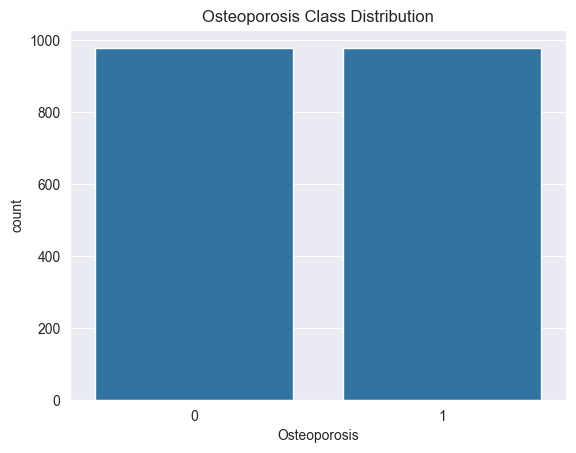

Osteoporosis
1    979
0    979
Name: count, dtype: int64


In [9]:
sns.countplot(x=data['Osteoporosis'])
plt.title("Osteoporosis Class Distribution")
plt.show()

print(data['Osteoporosis'].value_counts())

In [10]:
data = data[data['Osteoporosis'] != 9]

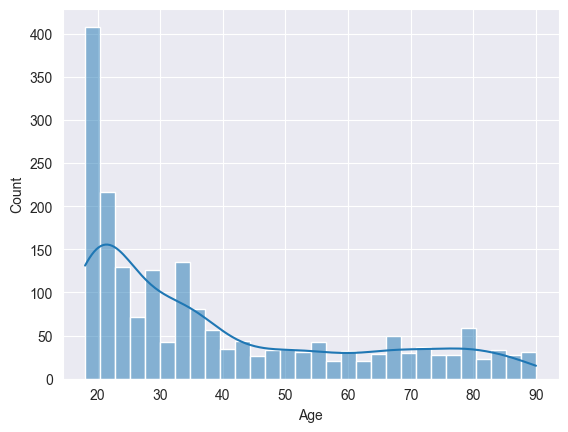

In [11]:
sns.histplot(data['Age'], bins=30, kde=True)
plt.show()

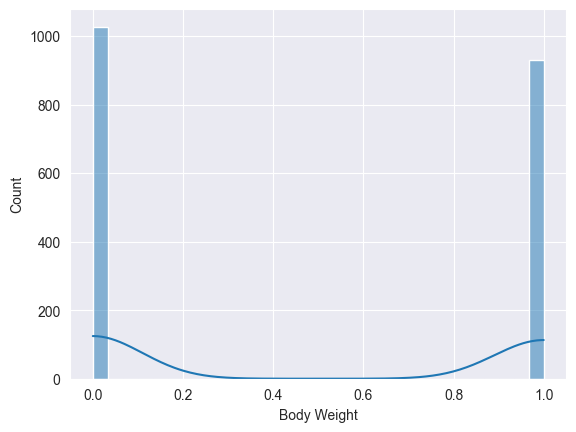

In [12]:
sns.histplot(data['Body Weight'], bins=30, kde=True)
plt.show()

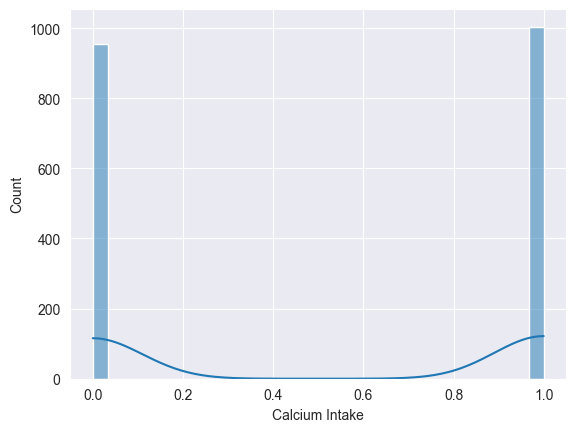

In [13]:
sns.histplot(data['Calcium Intake'], bins=30, kde=True)
plt.show()

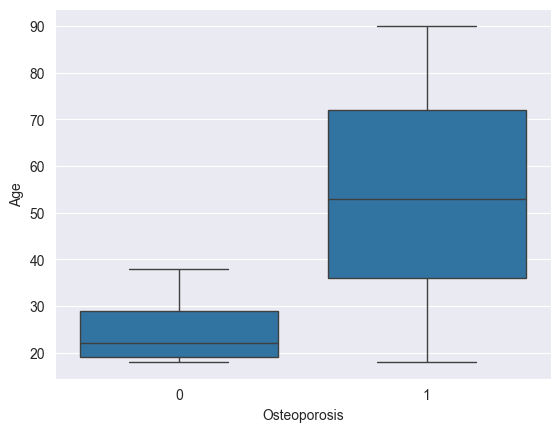

In [14]:
sns.boxplot(x=data['Osteoporosis'], y=data['Age'])
plt.show()

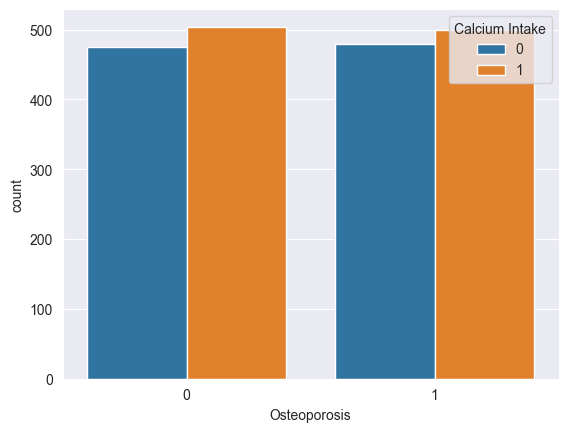

In [16]:
sns.countplot(x=data['Osteoporosis'], hue=data['Calcium Intake'], data=data)
plt.show()

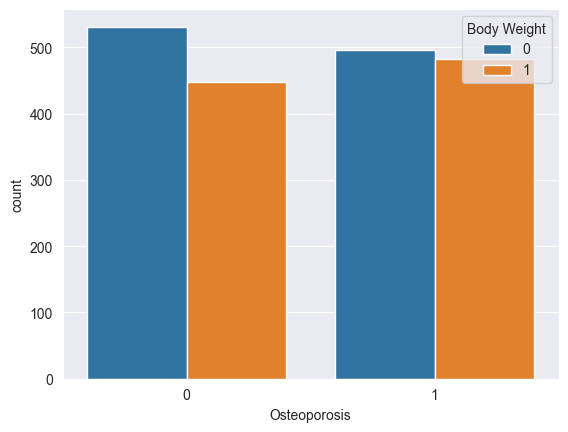

In [17]:
sns.countplot(x=data['Osteoporosis'], hue=data['Body Weight'], data=data)
plt.show()

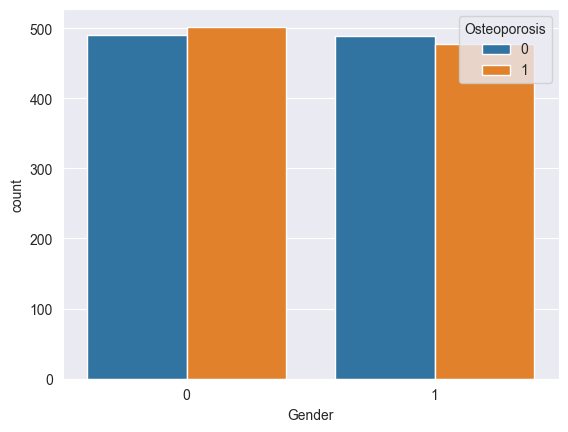

In [61]:
sns.countplot(x=data['Gender'], hue=data['Osteoporosis'])
plt.show()

In [18]:
def check_nan(df):
    nan_columns = df.columns[df.isna().any()].tolist()
    return nan_columns

check_nan(data)

['Alcohol Consumption', 'Medical Conditions', 'Medications']

In [12]:
# data = pd.DataFrame(columns=['Id', 'Age', 'Gender', 'Hormonal Changes', 'Family history', 'Race/Ethnicity', 'Body weight', 'Calcium intake', 'Vitamin D Intake', 'Physical activity', 'Smoking', 'Alcohol Consumption', 'Medical Consumptions', 'Medications', 'Prior Fractures', 'Osteoporosis'])

In [ ]:
# folders = ["2013-2014","2017-2020"]
# files = ["OSQ", "DEMO", "BMX", "ALQ", "BIOPRO", "DR1TOT", "PAQ", "RHQ", "SMQ"]
# codes = ['SEQN', 'OSQ060', 'OSQ160A', 'OSQ160B', 'ALQ121', 'ALQ130', 'SMQ621', 'SMD030', 'RHD043', 'RHQ060', 'RHQ540', 'PAD615', 'PAD660', 'PAD675', 'PAD680', 'PAD645', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH3', 'BMXWT', 'BMXHT', 'BMXBMI', 'DR1TVD', 'DR1TCALC', 'LBXSCA']
# labels_mapping = {
#     'SEQN': 'Id',
#     'RIDAGEYR': 'Age',
#     'RIAGENDR': 'Gender',
#     'RHD043': 'Hormonal Changes',
#     'OSQ160A': 'mother osteoporosis',
#     'OSQ160B': 'father osteoporosis',
#     'RIDRETH3': 'Race/Ethnicity',
#     'BMXBMI': 'Body Weight', # BMI <18.5 - underweight || >18.5>24.9 - normal
#     'DR1TCALC': 'Calcium Intake', #
#     'OSQ060': 'osteoporosis',
#     'ALQ121': 'alcohol past 12 mos',
#     'ALQ130': 'avg alcohol/day past 12 mos',
#     'SMQ020': 'Smoking',
#     'PAD615': 'physical work (min)',
#     'PAD660': 'vigorous exercise (min)',
#     'PAD675': 'moderate exercise (min)',
#     'PAD680': 'sedentary (min)',
#     'PAD645': 'walk/bike (min)',
#     'BMXWT': 'weight',
#     'BMXHT': 'height',
#     'DR1TVD': 'vit.D intake',
#     'LBXSCA': 'total calcium mg/dL'
# }
# 
# data = pd.DataFrame(columns=['patient', 'osteoporosis', 'age', 'gender', 'ethnicity', 'weight', 'height', 'BMI', 'menopause', 'age of last period', 'female HRT',  'vit.D intake', 'calcium intake', 'total calcium mg/dL', 'alcohol past 12 mos', 'avg alcohol/day past 12 mos', 'cigarettes smoked', 'regular smoking age', 'physical work (min)', 'vigorous exercise (min)', 'moderate exercise (min)', 'sedentary (min)', 'walk/bike (min)', 'mother osteoporosis', 'father osteoporosis', ])
# for folder in folders:
#     for file in files:
#         file_path = f"{folder}/{file}.xpt"
#         # file_path = "2015-2016/SMQ.xpt"
#         df = pd.read_sas(file_path, format="xport")
#         filtered = df.filter(items = codes)
#         filtered.rename(columns=labels_mapping, inplace=True)
#         data = pd.concat([data, filtered], ignore_index=True)
#         data = data.groupby('patient', as_index=False).first()
#     
# 
# # data.dropna(axis=0, how='any', inplace=True)
# data = data.dropna(subset=["osteoporosis", "vit.D intake", "calcium intake", "total calcium mg/dL", "age", "gender", "ethnicity", "weight", "height", "alcohol past 12 mos"])
# data = data.dropna(thresh=10)
# 
# 
# 
# data.dropna(subset=['osteoporosis'], inplace=True)
# print(data.shape)
# data